<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-06-09-PCA/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [5]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
X.shape

(569, 30)

In [7]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(X)

In [8]:
# Co-Variance Matrix

cov_mat = np.matmul(scaled.T, scaled)
cov_mat.shape

(30, 30)

In [9]:
# Eigen Value
# Eigen Vector

values, vectors = np.linalg.eig(cov_mat)

values.shape, vectors.shape

((30,), (30, 30))

In [14]:
np.round(values, 1)

array([7.5572e+03, 3.2384e+03, 1.6034e+03, 1.1270e+03, 9.3810e+02,
       6.8700e+02, 3.8420e+02, 2.7120e+02, 2.3720e+02, 1.9950e+02,
       1.6720e+02, 1.4860e+02, 1.3730e+02, 8.9300e+01, 5.3600e+01,
       4.5400e+01, 3.3800e+01, 2.9900e+01, 2.8200e+01, 1.0000e-01,
       4.0000e-01, 9.0000e-01, 3.9000e+00, 4.7000e+00, 8.8000e+00,
       1.0300e+01, 1.3800e+01, 1.5600e+01, 1.7700e+01, 1.7100e+01])

In [20]:
# prefix sum

np.round(np.cumsum(values) / values.sum(), 3)

array([0.443, 0.632, 0.726, 0.792, 0.847, 0.888, 0.91 , 0.926, 0.94 ,
       0.952, 0.961, 0.97 , 0.978, 0.983, 0.986, 0.989, 0.991, 0.993,
       0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.996, 0.996, 0.997,
       0.998, 0.999, 1.   ])

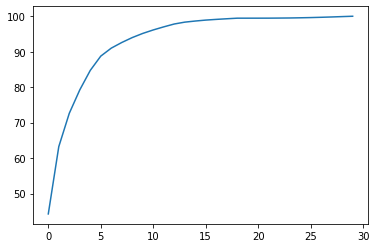

In [21]:
plt.plot(np.cumsum(values) * 100 / values.sum())

In [22]:
v = vectors[:, :2]

In [23]:
v.shape

(30, 2)

In [24]:
# Project each dataset to Principle component

D2 = np.matmul(scaled, v)

print(scaled.shape, ' x ', v.shape, ' = ', D2.shape)

(569, 30)  x  (30, 2)  =  (569, 2)


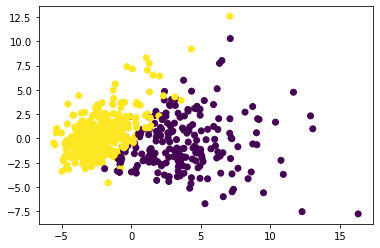

In [25]:
plt.scatter(D2[:, 0], D2[:, 1], c = y)
plt.show()

In [26]:
# same result at random_state = 7

from sklearn.model_selection import  train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(D2, y, random_state = 9)

In [27]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(xtrain, ytrain)
log.score(xtest, ytest)

0.958041958041958

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled, y, random_state = 9)

log.fit(xtrain, ytrain)
log.score(xtest, ytest)

0.986013986013986

Sklearn PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

D3 = pca.fit_transform(scaled)

In [30]:
D3.shape

(569, 2)

# PC

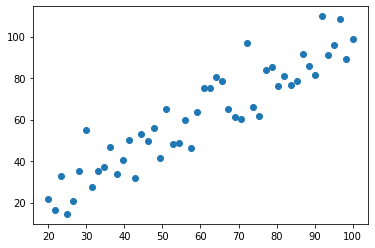

In [31]:
x1 = np.linspace(20, 100)
x2 = x1 + np.random.randn(x1.size)*10
plt.scatter(x1, x2)

In [ ]:
X = np.dstack([x1,x2])[0]

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

pca = PCA()

pca.fit_transform(X)

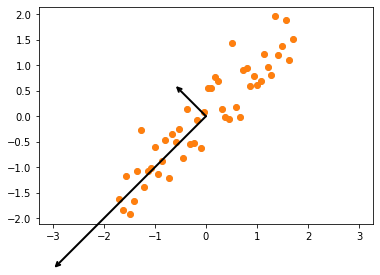

In [33]:
def draw(X, pca):
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        v0 = pca.mean_
        v1 = pca.mean_ + v

        ax = plt.gca()
        arrowprops = {
            'arrowstyle':'<-',
            'linewidth' : 2,
            'shrinkA':0,
            'shrinkB':0
        }
        ax.annotate('', v0, v1, arrowprops=arrowprops)
    
    plt.axis('equal')

draw(X, pca)

plt.scatter(X[:, 0], X[:, 1])
plt.show()